In [1]:
import numpy as np

from prospect.specutils import Spectra
from prospect import viewer

from IPython.display import clear_output

import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.image as img
from matplotlib.pyplot import rc
%matplotlib inline

from astropy.convolution import convolve, Gaussian1DKernel

import pickle
plt.rcParams['font.size'] = 14

In [2]:
with open("/pscratch/sd/j/juikuan/DESI_LAE_dataset/original_dataset/iron_pre_lite.pkl", "rb") as fh:
    spectra = pickle.load(fh)

In [3]:
def inspector(spectra, label_path):
    with open(label_path, "rb") as fh:
        labels = pickle.load(fh)
    n = 0
    for i in range(0, len(spectra)):
        spectrum = spectra[i]
        label = labels[i]
        if spectrum["TARGETID"] != label["TARGETID"]:
            print(f"Inconsistent targetid at {i}")
            break
        else:
            pass
        n += 1
        if "VI" not in label:
            label["VI"] = []
        else:
            pass
        
        if len(label["VI"]) == 0:
            pass
        else:
            continue
        print(f"No.{n} / {len(spectra)}")
        flux = spectrum["FLUX"]
        wavelength = spectrum["WAVE"]
        redshift = spectrum["Z"]
        ivar = spectrum["IVAR"]
        targetid = spectrum["TARGETID"]

        if redshift > 1.96:
            vlines = np.array([1215.67, 1549, 1908, 2796]) * (redshift  + 1)
            #Lya, CIV, CIII, and MGII

        elif redshift < 0.4:
            vlines = np.array([3726.032, 3968.47, 4101.734, 4340, 4861, 5007, 4959, 6562.81]) * (redshift  + 1)
            #OII, HEPSILON, HDELTA, HGAMMA, HBETA, OIII, and HALPHA
        else:
            pass

        vlines = vlines[vlines < wavelength[-1]]
        vlines = vlines[vlines > wavelength[0]]

        w = wavelength
        f = flux
        iv = np.sqrt(ivar) ** -1

        plt.close()
        plt.rcParams['figure.figsize'] = (32,8)
        plt.title(f"target ID = {targetid}\n"
                  f"Redshift = {redshift}\n", loc = 'left')
        plt.xlabel('$\lambda\ [\AA]$')
        plt.ylabel('$f_{\lambda}$ $(10^{-17}$ $erg$ $s^{-1}$ $cm^{-2}$ $\AA^{-1})$')

        # if mode == "divide":
        #     plt.plot(w, f / iv, color = 'k', alpha = 0.2, label = 'Unsmoothed spectrum', lw = 1)
        #     plt.plot(w, convolve(f / iv, Gaussian1DKernel(2)), color = 'k', label = 'Smoothed spectrum', lw = 1)
        #     plt.plot(w, convolve(iv, Gaussian1DKernel(2)), color = 'orange', alpha = 0.5, label = 'noise', lw = 1)
        #     ymax = np.max(f / iv)
        #     ymin = np.min(f / iv)
        #     plt.xlim(3500, 9900)
        #     plt.ylim(ymin, ymax)                
        # else:
        plt.plot(w, f, color = 'k', alpha = 0.2, label = 'Unsmoothed spectrum', lw = 1)
        plt.plot(w, convolve(f, Gaussian1DKernel(2)), color = 'k', label = 'Smoothed spectrum', lw = 1)
        plt.plot(w, convolve(iv, Gaussian1DKernel(2)), color = 'orange', alpha = 0.5, label = 'noise', lw = 1)
        ymax = np.std(f, ddof = 1) * 7
        ymin = -np.std(f, ddof = 1) * 7
        plt.xlim(3500, 9900)
        plt.ylim(ymin, ymax)

        for j in vlines:
            plt.vlines(x = j, ymin = ymin, ymax = ymax, color = "b", linestyles = "dashed", lw = 1)

        plt.legend()
        plt.show()

        if redshift < 0.4:
            mask_min = wavelength > 3726.032 * (redshift + 1) - 50
            mask_max = wavelength < 3726.032 * (redshift + 1) + 50
            w = wavelength[mask_min & mask_max]
            f = flux[mask_min & mask_max]
            iv = np.sqrt(ivar[mask_min & mask_max]) ** -1

            if np.max(f) == np.inf:
                f[np.where(f == np.inf)] = np.median(f)
            elif np.max(iv) == np.inf:
                iv[np.where(iv == np.inf)] = np.median(iv)
            else:
                pass

            plt.rcParams['figure.figsize'] = (7, 4)
            plt.plot(w, f, color = 'k', alpha = 1, label = 'Unsmoothed spectrum')
            plt.plot(w, iv, color = 'orange', alpha = 0.7, label = 'noise')
            plt.hlines(y = 0, xmin = 3726.032 * (redshift + 1) - 50, xmax = 3726.032 * (redshift + 1) + 50)
            plt.show()

        elif redshift > 1.96:
            mask_min = wavelength > 1215.67 * (redshift + 1) - 50
            mask_max = wavelength < 1215.67 * (redshift + 1) + 50
            w = wavelength[mask_min & mask_max]
            f = flux[mask_min & mask_max]
            iv = np.sqrt(ivar[mask_min & mask_max]) ** -1

            if np.max(f) == np.inf:
                f[np.where(f == np.inf)] = np.median(f)
            elif np.max(iv) == np.inf:
                iv[np.where(iv == np.inf)] = np.median(iv)
            else:
                pass

            plt.rcParams['figure.figsize'] = (7,4)
            plt.plot(w, f, color = 'k', alpha = 1, label = 'Unsmoothed spectrum')
            plt.plot(w, iv, color = 'orange', alpha = 0.7, label = 'noise')
            plt.hlines(y = 0, xmin = 1215.67 * (redshift + 1) - 50, xmax = 1215.67 * (redshift + 1) + 50)
            plt.show()

        print("Is it a LAE?")
        print(f"https://www.legacysurvey.org/viewer-desi/desi-spectrum/dr1/targetid{targetid}")
        again = True
        exit = False
        while again:
            try:
                answer1 = input("None:Skip / 0:Exit / 1:LAE / 2:NLAE / 3:Other")
                if answer1 == "":
                    pass
                elif int(answer1) == 0:
                    exit = True
                    break
                elif int(answer1) == 1:
                    label["VI"].append("LAE")
                elif int(answer1) == 2:
                    label["VI"].append("NLAE")
                elif int(answer1) == 3:
                    label["VI"].append("Other")
                again = False
                clear_output()
            except:
                print("Only None, 0, 1, 2, and 3 are legal!")

        if exit == True:
            break
        else:
            pass
        if n % 5 == 0:
            with open(label_path, "wb") as fh:
                pickle.dump(labels, fh)
            print("Haved been saved to the pkl file!")
        else:
            pass
        print("===============================================================================================================================")
    with open(label_path, "wb") as fh:
        pickle.dump(labels, fh)
    print("Haved been saved to the pkl file!")
    return labels

No.845 / 5126


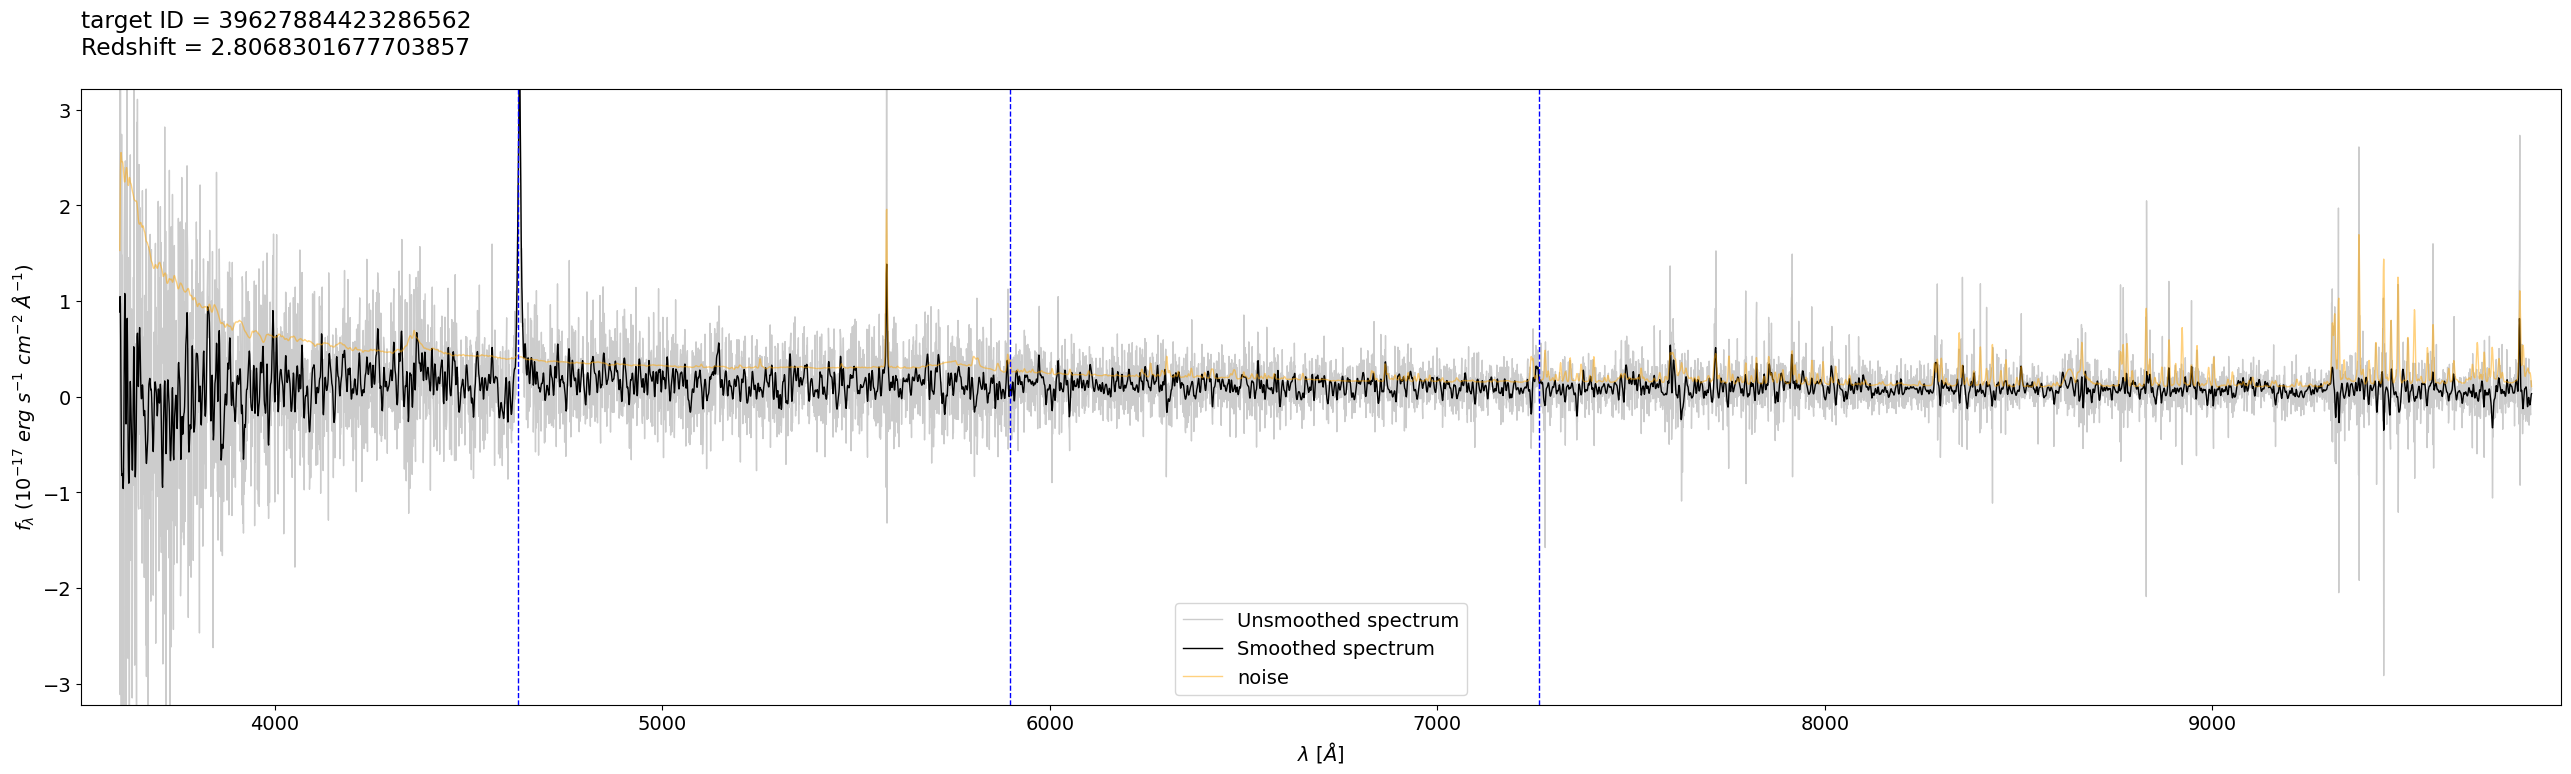

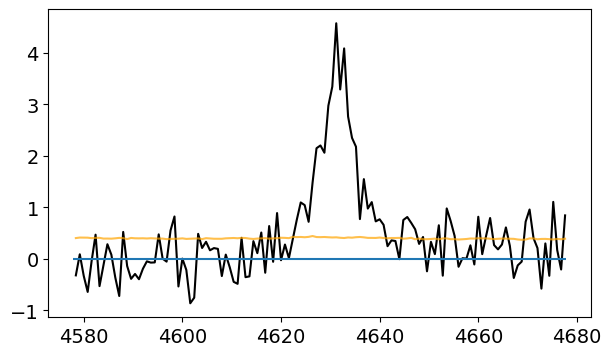

Is it a LAE?
https://www.legacysurvey.org/viewer-desi/desi-spectrum/dr1/targetid39627884423286562


In [ ]:
labels = inspector(spectra = spectra, label_path = "/pscratch/sd/j/juikuan/DESI_LAE_dataset/VI/iron_pre.pkl")

In [6]:
def prospect_VI(spectra, html_dir):
    a = viewer.plotspectra(spectra = spectra, html_dir = html_dir)
    return a

In [7]:
a = prospect_VI(spectra = spectra[0]["SPECTRUM"], html_dir = "../DESI_LAE_dataset/")